#About

In [1]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

#Data

In [2]:
import pandas
data = pandas.read_csv('data/inputs/popularity-910days.csv')

#DataPreparation

Data preparation for the further analysis.

In [3]:
from datapop import DataPreparation
metadata, access_history = DataPreparation(data=data).preparation()

In [4]:
access_history.head()

,Name,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,/LHCb/Calibration10/Beam3500GeV-VeloClosed-Mag...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,/LHCb/Calibration11/Beam3500GeV-VeloClosed-Mag...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,/LHCb/Calibration11/Beam3500GeV-VeloClosed-Mag...,0,2075,2065,4120,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,/LHCb/Calibration11/Beam3500GeV-VeloClosed-Mag...,0,0,0,133,2415,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,/LHCb/Calibration11/Beam3500GeV-VeloClosed-Mag...,0,0,0,0,2906,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
metadata.head()

,Name,Configuration,ProcessingPass,FileType,Type,Creation_week,NbLFN,LFNSize,NbDisk,DiskSize,...,IN2P3,PIC,RAL,SARA,Nb_Replicas,Nb_ArchReps,Storage,FirstUsage,LastUsage,Now
0,/LHCb/Calibration10/Beam3500GeV-VeloClosed-Mag...,/LHCb/Calibration10,/RealData,RAW,1,104788,381,0.578732,0,0,...,0,0,0,0,0,0,Tape,104737,104737,104788
1,/LHCb/Calibration11/Beam3500GeV-VeloClosed-Mag...,/LHCb/Calibration11,/RealData,RAW,1,104788,1743,5.141242,0,0,...,0,0,0,0,0,0,Tape,104734,104752,104788
2,/LHCb/Calibration11/Beam3500GeV-VeloClosed-Mag...,/LHCb/Calibration11,/RealData,RAW,1,104788,4396,10.636304,0,0,...,0,0,0,0,0,0,Tape,104660,104777,104788
3,/LHCb/Calibration11/Beam3500GeV-VeloClosed-Mag...,/LHCb/Calibration11,/RealData,RAW,1,104788,2858,8.697603,0,0,...,0,0,0,0,0,0,Tape,104662,104777,104788
4,/LHCb/Calibration11/Beam3500GeV-VeloClosed-Mag...,/LHCb/Calibration11,/RealData,RAW,1,104788,1849,5.712885,0,0,...,0,0,0,0,0,0,Tape,104663,104777,104788


#AccessProbabilityPrediction

Long-term prediction. Predict probabilities that the datasets will be accessed during **forecast_horizont** (in weeks) in future.

**Probability**: predicted probabilities. In [0, 1] range.

**roc_auc**: quality of the prediction. The closer to 1 the better.

**precision0**: other quality metric. The closer to 1 the better.

In [6]:
from datapop import AccessProbabilityPrediction
app = AccessProbabilityPrediction(metadata=metadata, access_history=access_history, forecast_horizont=26)
report = app.predict()
report.head()

,Name,Probability,roc_auc,precision0
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.568533,0.87167,0.879721
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.038962,0.87167,0.879721
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.061476,0.87167,0.879721
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.323890,0.87167,0.879721
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.326895,0.87167,0.879721


Data for the train and test a classifier. to_predict data is for the probabilities prediction.

**recency**: tiem when a dataset was accessed the last time (in weeks).
    
**reuse_distance**: distance between the last and the second last accesses to a dataset.
    
**first_used**: time when a dataset was accessed the first time.
    
**creation**: creation time.

**frequency**: number of accesses to a dataset for the last year.
    
**frequency_week**: number of weeks when a dataset was accessed for the last year.
    
**type**: MC or real data.
    
**extention**: RAW, DST, RDST and so on.
    
**size**: size of a dataset.
    
**nblfn**: NbLFN of a dataset.

In [7]:
train, test, to_predict = app.data_preprocessing(metadata=metadata, 
                                                 access_history=access_history, 
                                                 forecast_horizont=26)
to_predict.head()

,Name,recency,reuse_distance,first_used,creation,frequency,frequency_week,type,extentions,size,nblfn
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,10,14,118,197,2122,6,1,1,0.317900,67
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,113,12,129,220,0,0,1,1,2.402856,871
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,75,27,113,220,0,0,1,1,0.085333,693
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,35,1,112,192,1177,6,1,1,0.649204,227
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,48,999,48,192,535,1,1,1,0.803981,256


#NumberAccessPrediction

Short-term forecst. Predict the datasets number of accesses during **forecast_horizont** (in weeks) in future.

**Prediction**: predicted number of accesses.

**rmse**: Root Mean Square Error of the forecast.

In [8]:
from datapop import NumberAccessPrediction
nar = NumberAccessPrediction(metadata=metadata, access_history=access_history, forecast_horizont=10)

In [9]:
report = nar.predict()
report.head()

,Name,Prediction,rmse
20,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.000000,158.476046
23,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.000000,0.288675
26,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.000000,21.083082
28,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,8.263944,25.396613
29,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.000000,0.000000


A time series forecast example:

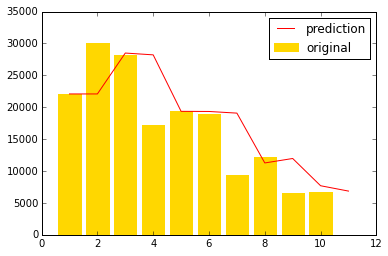

In [10]:
Y = nar.ts_predictions[54][0]
Y_pred = nar.ts_predictions[54][1]
plt.bar(range(1, len(Y)+1), Y, label='original', align='center', color='gold', edgecolor='gold')
plt.plot(range(1, len(Y)+2), Y_pred, label='prediction', color='red')
plt.legend(loc='best')
plt.show()

#ReplicationPlacementStrategy

class **ReplicationPlacementStrategy** generates data replication recommendation.

pandas.DataFrame **data**: data for the analysis.
    
int **min_replicas**: minimum number of datasets replicas. Default: 1
        
int **max_replicas**: maximum number of datasets replicas. Default: 7

In [11]:
from datapop import ReplicationPlacementStrategy
rps = ReplicationPlacementStrategy(data=data, min_replicas=1, max_replicas=7)

Recommendations for which datasets decrease number of replicas and in wich order to **save N Tb** disk space. Reduce just one replica in one step. Number of replicas for the datasets with the lowest metric value are decreased first.

int **n_tb**: number of Tb wanted to save. If **None** - reduce number of replicas for all datasets. Default: None

In [12]:
report = rps.save_n_tb(n_tb=10)
report.head()

,Name,Probability,roc_auc,precision0,Prediction,rmse,Nb_Replicas,LFNSize,Metric,DecreaseReplicas
0,/LHCb/Collision11/Beam3500GeV-VeloClosed-MagUp...,0.000766,0.87076,0.880702,0,0,3,0.026176,0,1
0,/LHCb/Collision11/Beam3500GeV-VeloClosed-MagUp...,0.000766,0.87076,0.880702,0,0,2,0.026176,0,1
0,/LHCb/Collision12/Beam4000GeV-VeloClosed-MagDo...,0.000790,0.87076,0.880702,0,0,3,0.072622,0,1
0,/LHCb/Collision12/Beam4000GeV-VeloClosed-MagDo...,0.000790,0.87076,0.880702,0,0,2,0.072622,0,1
0,/LHCb/Collision12/Beam4000GeV-VeloClosed-MagUp...,0.000790,0.87076,0.880702,0,0,3,0.072658,0,1


Recommendations for which datasets increase number of replicas and in wich order to **fill N Tb** of disk space. Add just one replica in one step. Number of replicas for the datasets with the highest metric value are increased first.

int **n_tb**: number of Tb wanted to fill. If **None** - increase number of replicas for all datasets. Default: None

In [13]:
report = rps.fill_n_tb(n_tb=100)
report.head()

,Name,Probability,roc_auc,precision0,Prediction,rmse,Nb_Replicas,LFNSize,Metric,IncreaseReplicas
0,/LHCb/Collision12/Beam4000GeV-VeloClosed-MagDo...,0.913776,0.871477,0.878849,90368.930288,38158.044273,3.985338,29.072362,22675.349064,1
0,/LHCb/Collision12/Beam4000GeV-VeloClosed-MagUp...,0.918607,0.871477,0.878849,86111.981671,31571.521761,4.008043,28.696464,21484.794866,1
0,/LHCb/Collision12/Beam4000GeV-VeloClosed-MagDo...,0.913776,0.871477,0.878849,90368.930288,38158.044273,4.985338,29.072362,18126.941501,1


Recommendations for which datasets can be remove from disks and in wich order to **clean N Tb** of disk space. The datasets with the lowest probability to be accessed are removed first.

int **n_tb**: number of Tb wanted to clean. If **None** - remove all datasets. Default: None

In [14]:
report = rps.clean_n_tb(n_tb=10)
report.head()

,Name,Probability,roc_auc,precision0,Prediction,rmse,Nb_Replicas,LFNSize
9048,/MC/Dev/Beam6500GeV-RunII-MagUp-Nu1.6-25ns-Pyt...,0.000757,0.870086,0.880174,0,0,1,0.094266
9047,/MC/Dev/Beam6500GeV-RunII-MagUp-Nu1.6-25ns-Pyt...,0.000757,0.870086,0.880174,0,0,1,0.094620
8430,/MC/2012/Beam4000GeV-2012-MagDown-Nu2.5-Pythia...,0.000780,0.870086,0.880174,0,0,1,0.037619
8429,/MC/2012/Beam4000GeV-2012-MagDown-Nu2.5-Pythia...,0.000780,0.870086,0.880174,0,0,1,0.038802
8832,/MC/2012/Beam4000GeV-2012-MagUp-Nu2.5-Pythia8/...,0.000780,0.870086,0.880174,0,0,1,0.033680


Combination of the long-term prediction and the short-term forecast reports.

pandas.DataFrame **data**: data for the analysis.

In [15]:
report = rps.get_combine_report(data)
report.head()

,Name,Probability,roc_auc,precision0,Prediction,rmse,Nb_Replicas,LFNSize
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.567469,0.871175,0.883174,6.660679,153.429956,2.000000,0.317900
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.054067,0.871175,0.883174,0.000000,0.256410,0.004592,2.402856
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.074486,0.871175,0.883174,0.000054,18.919273,0.001443,0.085333
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.329176,0.871175,0.883174,10.675200,22.378141,3.973568,0.649204
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.329020,0.871175,0.883174,0.000000,0.000000,3.984375,0.803981


Combination of the long-term prediction and the short-term forecast reports with dataset features.

pandas.DataFrame **data**: data for the analysis.

In [16]:
report = rps.get_full_combine_report(data)
report.head()

,Name,Probability,roc_auc,precision0,Prediction,rmse,Nb_Replicas,LFNSize,recency,reuse_distance,first_used,creation,frequency,frequency_week,type,extentions,size,nblfn
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.587936,0.872273,0.881396,6.660679,153.429956,2.000000,0.317900,10,14,118,197,2122,6,1,1,0.317900,67
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.040452,0.872273,0.881396,0.000000,0.256410,0.004592,2.402856,113,12,129,220,0,0,1,1,2.402856,871
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.073889,0.872273,0.881396,0.000054,18.919273,0.001443,0.085333,75,27,113,220,0,0,1,1,0.085333,693
3,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.313713,0.872273,0.881396,10.675200,22.378141,3.973568,0.649204,35,1,112,192,1177,6,1,1,0.649204,227
4,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.305612,0.872273,0.881396,0.000000,0.000000,3.984375,0.803981,48,999,48,192,535,1,1,1,0.803981,256
